In [5]:
# import required packages
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
!pip install contextily
!pip install geoplot
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import pyproj
import contextily as ctx
import seaborn as sns
import geoplot as gplt
import geoplot.crs as gcrs

In [6]:
# Data-preprocessing
# Import data
# Read in csv data using pandas
age = pd.read_csv('age.csv')
crime = pd.read_csv('crime_10_2021.csv')

# Read in the shape file data
leeds_path = 'OA.shp'
print(leeds_path)
leeds = gpd.read_file(leeds_path)

# Look at the colums in the data
age.columns
crime.columns

# Check for missing data
age.isnull().sum()
crime.isnull().sum()

# Calculate the total number of offences in each area of Leeds. And write the
# results into a new data frame to facilitate subsequent analysis of the number
# of crimes in each area of Leeds.
grouped_crime = crime.groupby('LSOA code')['number of offences'].sum().reset_index()
print(grouped_crime)
crime_region = pd.DataFrame(grouped_crime)

# Link the age dataframe and the crime_region dataframe together to allow the
# subsequent analysis of the relationship between the proportion of the youth
# population in Leeds and the crime rate.
age_crime  = pd.merge(age, crime_region,  left_on='LSOA 2021 Code', right_on='LSOA code', how='left')
age_crime.head()

# Join the age_crime data frame to the OA shape file so that the age_crime data
# frame also has spatial attributes for subsequent mapping.
leeds_new = pd.merge(leeds, age_crime, left_on='LSOA21CD', right_on='LSOA code',how='left');
leeds_new.head()


OA.shp
     LSOA code  number of offences
0    E01011264                   6
1    E01011265                  20
2    E01011266                   6
3    E01011267                  20
4    E01011268                  11
..         ...                 ...
473  E01033031                  41
474  E01033032                  28
475  E01033033                   8
476  E01033034                  18
477  E01033035                  38

[478 rows x 2 columns]


,OA21CD,LSOA21CD,LSOA21NM,LSOA21NMW,BNG_E,BNG_N,LAT,LONG,GlobalID,geometry,...,F65 and over,M0 to 15,M16 to 29,M30 to 44,M45 to 64,M65 and over,youngs,proportion of youth population,LSOA code,number of offences
0,E00056750,E01011269,Leeds 011B,None,420518,441177,53.8664,-1.68948,897da6eb-b6e4-4bae-adee-e376a3aee776,"POLYGON ((420675.101 441465.476, 420674.348 44...",...,264.0,120.0,107,135.0,217.0,173.0,423,26.72,E01011269,9.0
1,E00056751,E01011272,Leeds 009D,None,419532,441190,53.8666,-1.70447,59fe0a1b-25dd-4e85-a1e5-daf5fffad986,"POLYGON ((419790.406 441141.836, 419790.832 44...",...,172.0,141.0,99,105.0,195.0,170.0,449,31.05,E01011272,4.0
2,E00056752,E01011273,Leeds 010B,None,420077,441208,53.8667,-1.69618,8c6510b3-519a-4307-80ef-6417d1f052a8,"POLYGON ((420251.937 441467.716, 420251.597 44...",...,177.0,122.0,94,171.0,181.0,115.0,477,32.63,E01011273,22.0
3,E00056753,E01011274,Leeds 010C,None,420949,441160,53.8662,-1.68292,5d240530-a015-4838-9f0b-121ac33c13f3,"POLYGON ((421132.508 441296.621, 421127.539 44...",...,163.0,126.0,122,105.0,173.0,134.0,485,35.12,E01011274,16.0
4,E00056754,E01011276,Leeds 011C,None,421146,441050,53.8652,-1.67993,56474073-d2cb-4513-9114-1d3ad4aa627f,"POLYGON ((421306.651 441017.719, 421304.313 44...",...,230.0,158.0,143,180.0,223.0,197.0,547,30.47,E01011276,7.0


In [7]:
# Calculate Spearman's rank correlation
leeds_ac_corr =leeds_new[['proportion of youth population','number of offences']].corr(method = 'spearman')
leeds_ac_corr

,proportion of youth population,number of offences
proportion of youth population,1.000000,0.503177
number of offences,0.503177,1.000000


Labels: Index(['proportion of youth population', 'number of offences'], dtype='object') Index(['proportion of youth population', 'number of offences'], dtype='object')
Labels with capital letters: ['Proportion of youth population', 'Number of offences'] ['Proportion of youth population', 'Number of offences']


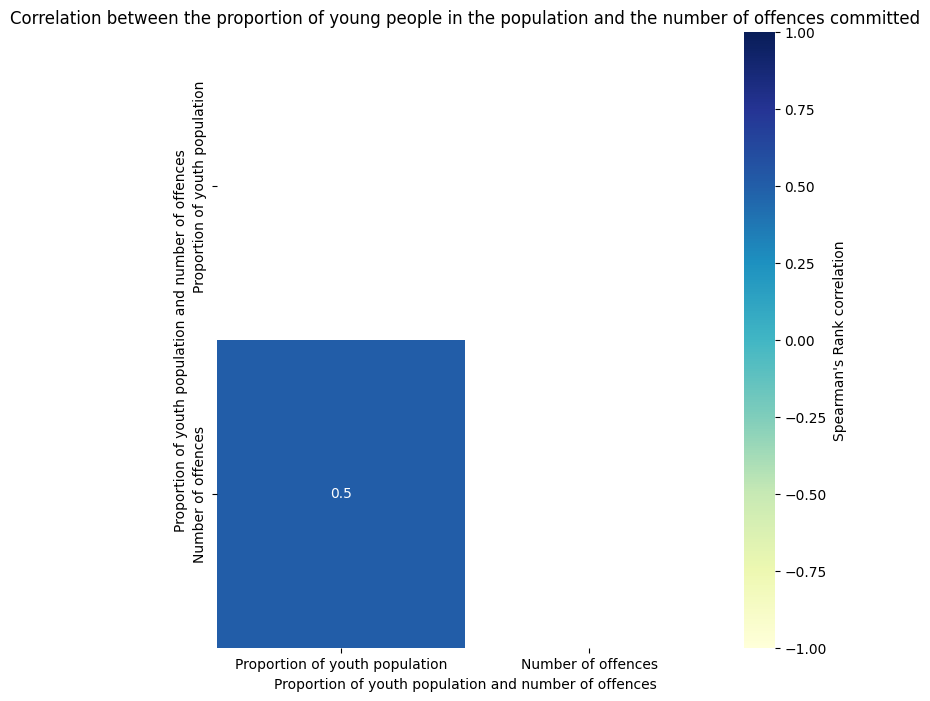

In [8]:
# Visualise the Spearman's rank correlation of the PPFI domains
# define plot size
fig,ax = plt.subplots(figsize=(8,8))

# define mask to apply to upper right hand corner of the plot
data_to_mask = np.triu(np.ones_like(leeds_ac_corr))

# define axis tick labels
# get the index and the columns, replace the underscores with spaces
x_axis_labels = leeds_ac_corr.columns.str.replace('_',' ')
y_axis_labels = leeds_ac_corr.index.str.replace('_',' ')

# Have a look at what the tick labels look like
print('Labels:',x_axis_labels ,y_axis_labels)

# If we want to capitalize each tick label
# for each element in the list of x_axis_labels, capitalize it
x_axis_labels = [element.capitalize() for element in x_axis_labels]
y_axis_labels = [element.capitalize() for element in y_axis_labels]

# look at the new labels
print('Labels with capital letters:',x_axis_labels ,y_axis_labels)


# plot a heatmap of the correlation dataframe
sns.heatmap(leeds_ac_corr,
            # annotate so spearman's rank correlation values are displayed on the squares
            annot=True,
            # define colourmap
            cmap='YlGnBu',
            # define value of minimum colour on cbar
            vmin=-1,
            # define value of maximum colour on cbar
            vmax=1,
            # add the mask
            mask=data_to_mask,
            # use the custom tick labels
            xticklabels=x_axis_labels,
            yticklabels=y_axis_labels,
            # add a label to the cbar
            cbar_kws={'label': "Spearman's Rank correlation"},
            # plot on the axis we defined
            ax=ax)

# Set axis labels
ax.set(xlabel="Proportion of youth population and number of offences",
       ylabel="Proportion of youth population and number of offences",
      title ='Correlation between the proportion of young people in the population and the number of offences committed' );
plt.savefig('Correlation_between_the_proportion_of_young_people_in_the_population_and_the_number_of_offences_committed.png')

# The two graphs below represent the proportion of the youth population in Leeds
# and the number of offences in Leeds respectively. The same colour labels have
# been chosen for both graphs and the values are arranged in order from smallest
# to largest so that the spatial variation of the values can be seen at a
# glance. The colour scheme from light yellow to dark blue was also chosen
# because it varies in the brightness of the colours, making both graphs easier
# to interpret.

# As can be seen in the graphs, there is a significant spatial correlation
# between the percentage of youth population and crime rates. Specifically,
# areas with high youth population rates typically have higher crime rates,
# while areas with low youth population rates typically have lower crime rates.
# The proportion of youth population is a significant factor influencing local
# crime rates. (Mulamba, 2021).

# A map of the spatial distribution of the proportion of youth population in
# Leeds shows that Leeds City Centre has the highest proportion of youth
# population. Areas of Leeds with a low proportion of youth population are
# concentrated in the north of the city, with higher proportions of youth
# population in Leeds city centre and the west. However, there are some
# anomalies, for example, four areas in Leeds City Centre have a youth
# population proportion below 20% and one area in South Leeds has a youth
# population proportion as high as 50% to 60%.

# The graph of the number of crimes in Leeds shows that there are more crimes in
# central Leeds and fewer in north Leeds. The area with the highest number of
# crimes is Leeds city centre with over 700 cases. There are eight areas with
# lower numbers of offences. The majority of areas in Leeds had less than 100
# offences, with a few areas having more than 200 offences. The spatial
# distribution is broadly similar to the proportion of the youth population in
# Leeds.

# In the future, additional variables such as the age structure of the Leeds
# population and the income levels of different age groups in Leeds could be
# included to explore the relationship between these variables and crime rates
# in the city. Areas with higher numbers of offences are compared with areas
# with lower numbers of offences to look for differences between the two. %%
# Data Visualisation spatial visualisation Join the age_crime data frame to the
# OA shape file so that the age_crime data frame also has spatial attributes for
# subsequent mapping.

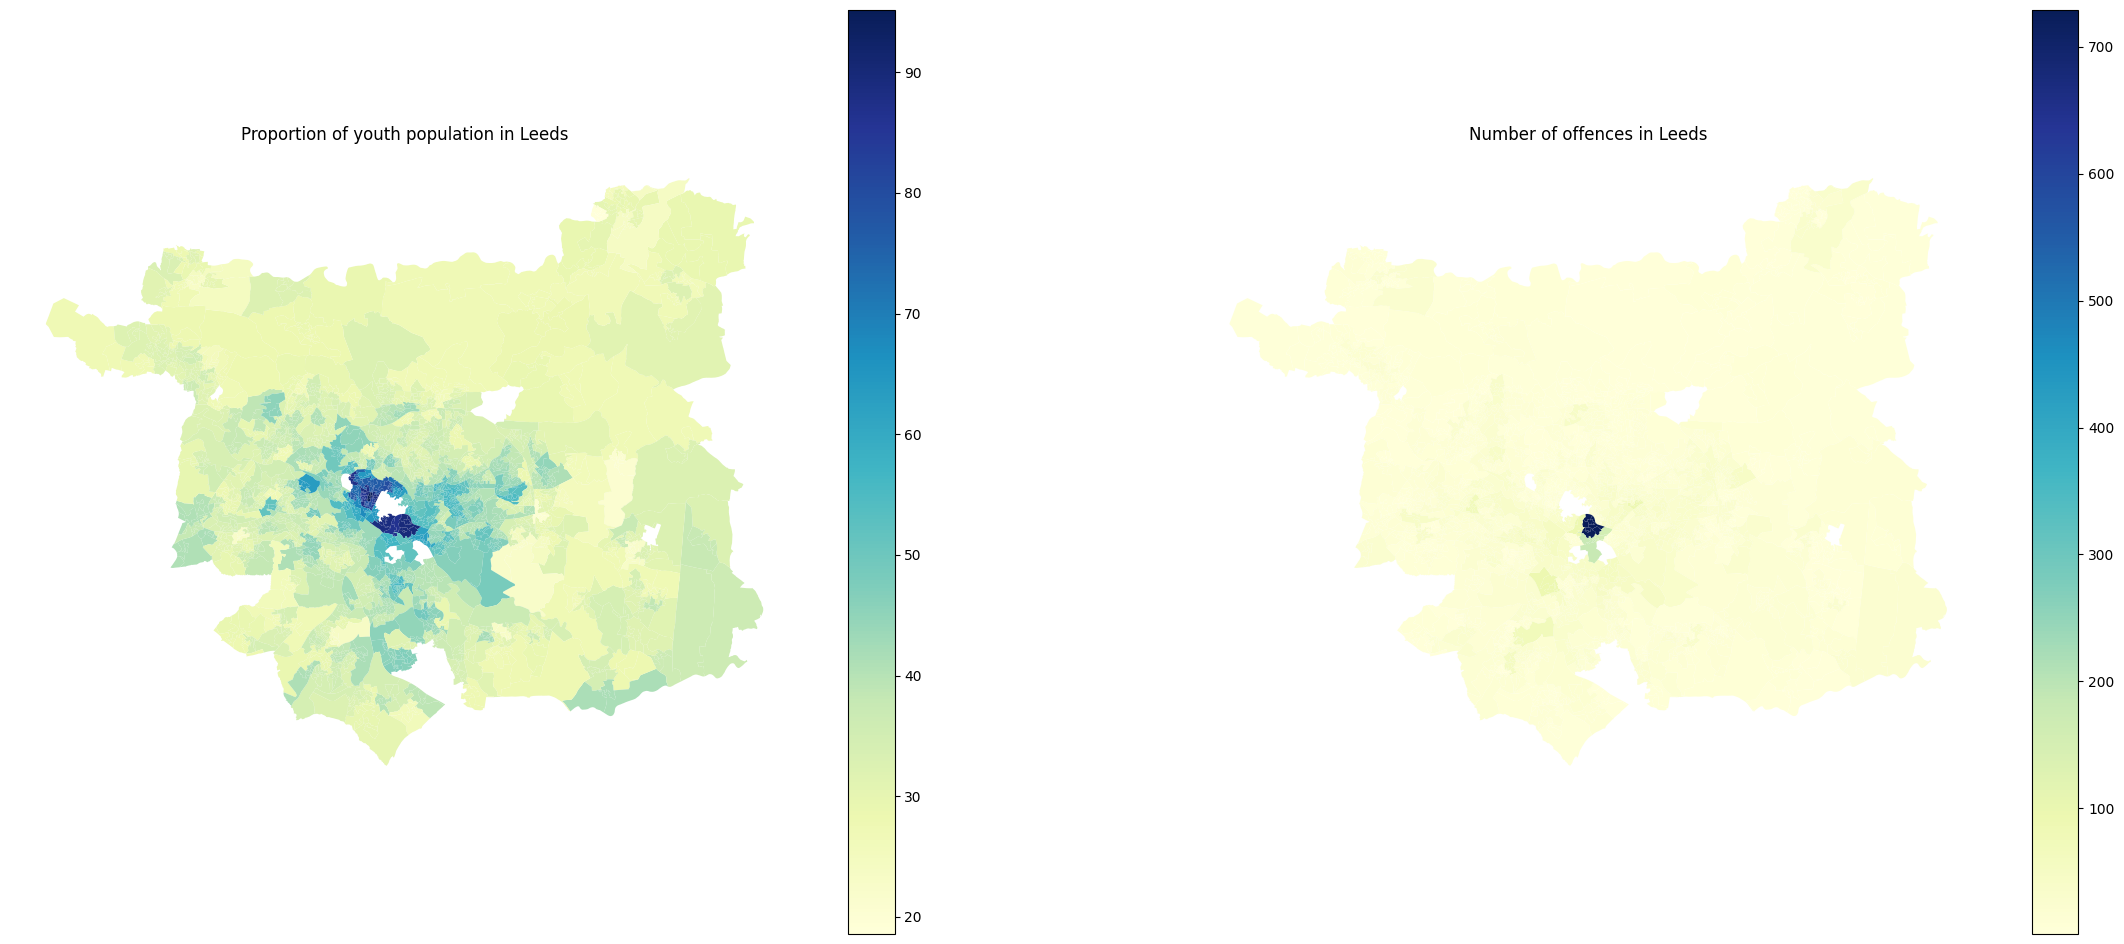

In [9]:
# Data Visualisation
# spatial visualisation
# Join the age_crime data frame to the OA shape file so that the age_crime data
# frame also has spatial attributes for subsequent mapping.
leeds_new = pd.merge(leeds, age_crime, left_on='LSOA21CD', right_on='LSOA code',how='left');
leeds_new.head()

# create a figure with three subplots (maps)
f,ax = plt.subplots(1,2, figsize=(28,12))

# plot population estimate in subplot 1
leeds_new.plot(ax=ax[0], column ='proportion of youth population', legend=True, cmap='YlGnBu')

# plot gdp estimate in subplot 2
leeds_new.plot(ax=ax[1], column ='number of offences', legend=True, cmap='YlGnBu')

# give subplot 1 an informative title
ax[0].set_title('Proportion of youth population in Leeds')

# give subplot 2 an informative title
ax[1].set_title('Number of offences in Leeds')

# make axis invisible for subplot 1
ax[0].set_axis_off()

# make axis invisible for subplot 2
ax[1].set_axis_off()

# show figure
plt.show()

# The two graphs below represent the proportion of the youth population in Leeds
# and the number of offences in Leeds. The same colour labels have been chosen
# for both graphs and both are arranged in order from smallest to largest values
# so that the spatial changes in values can be seen at a glance. The colour
# scheme of light yellow to dark blue has also been chosen because it has a
# variation in the brightness of the colours, making both graphs easier to
# interpret.

# As can be seen from the figure, there is a significant spatial correlation
# between the proportion of youth population and crime rates. Specifically,
# areas with a high proportion of young people are usually accompanied by higher
# crime rates, while areas with a low proportion of young people usually have
# lower crime rates. The proportion of youth population is an important factor
# influencing local property crime rates. (Mulamba, 2021)

# A map of the spatial distribution of the proportion of young people in Leeds
# shows that the highest proportion of young people is found in the city centre
# of Leeds. Lower proportions of the youth population in Leeds are concentrated
# in the north of the city, with higher proportions of the youth population in
# the centre and west of Leeds city. However, there are some anomalies, for
# example, four areas in central Leeds have a youth population of less than 20%
# and one area in south Leeds has a high youth population of between 50% and
# 60%.

# As can be seen from the graph of the number of crimes in Leeds, there is very
# little variation in all but one area of Leeds city centre. The area with the
# highest number of crimes was in Leeds city centre with over 700 cases. There
# are eight areas with a lower number of crimes. Most areas of Leeds had less
# than 100 offences, with a few areas having greater than 200 offences. The
# spatial distribution is broadly similar to the proportion of the youth
# population in Leeds.

# In the future, more variables, such as the age structure of the Leeds
# population and the income levels of different age groups in Leeds, could be
# included to explore the relationship between these variables and urban crime
# rates. Attempts could also be made to change the grading structure of the
# number of offences in Leeds to make the differences between areas more
# apparent. Compare areas with a high number of offences with areas with a low
# number of offences and look for differences between the two.


In [10]:
# Reference
# Mulamba, K.C. 2021. A Spatial Analysis of Property Crime Rates in South Africa. The South African Journal of economics. 89(3), pp.329–347.
# Griffiths, G. and Norris, G. 2020. Explaining the crime drop: contributions to declining crime rates from youth cohorts since 2005. Crime, law, and social change. 73(1), pp.25–53.
# Parker, K.F. 2015. The African-American Entrepreneur–Crime Drop Relationship: Growing African-American Business Ownership and Declining Youth Violence. Urban affairs review (Thousand Oaks, Calif.). 51(6), pp.751–780.
# Sandoval Garrido, L.E. 2021. Youth crime in Colombia. Papeles de población. 26(105), pp.131–154.
# TARLING, R. and DENNIS, R. 2016. Socio-Economic Determinants of Crime Rates: Modelling Local Area Police-Recorded Crime. Howard journal of crime and justice. 55(1–2), pp.207–225.

